In [1]:
import os, shutil
first_dataset_dir = '../datasets/train1'
second_dataset_dir = '../datasets/train2'
third_dataset_dir = '../datasets/train3'
fourth_dataset_dir = '../datasets/train4'
fifth_dataset_dir = '../datasets/train5'
test_dataset_dir = '../datasets/test'

In [2]:
from keras.utils import image_dataset_from_directory
IMG_SIZE = 32

train_ds1 = image_dataset_from_directory(first_dataset_dir, image_size=(IMG_SIZE, IMG_SIZE), batch_size=32, label_mode='categorical')
# 6 % 5 + 1 = 2
val_ds2 = image_dataset_from_directory(second_dataset_dir, image_size=(IMG_SIZE, IMG_SIZE), batch_size=32, label_mode='categorical')
train_ds3 = image_dataset_from_directory(third_dataset_dir, image_size=(IMG_SIZE, IMG_SIZE), batch_size=32, label_mode='categorical')
train_ds4 = image_dataset_from_directory(fourth_dataset_dir, image_size=(IMG_SIZE, IMG_SIZE), batch_size=32, label_mode='categorical')
train_ds5 = image_dataset_from_directory(fifth_dataset_dir, image_size=(IMG_SIZE, IMG_SIZE), batch_size=32, label_mode='categorical')
test_ds = image_dataset_from_directory(test_dataset_dir, image_size=(IMG_SIZE, IMG_SIZE), batch_size=32, label_mode='categorical')

Found 10000 files belonging to 10 classes.
Found 10000 files belonging to 10 classes.
Found 10000 files belonging to 10 classes.
Found 10000 files belonging to 10 classes.
Found 10000 files belonging to 10 classes.
Found 10000 files belonging to 10 classes.


In [3]:
print (type(train_ds1))
print (train_ds1.class_names)

full_train_ds = train_ds1.concatenate(train_ds3).concatenate(train_ds4).concatenate(train_ds5)

# Even if we switch datatypes back to the original
# Methods like class_names are not available
# So we keep it as "concatenated dataset" instead of "prefetch dataset"
# full_train_ds = full_train_ds.prefetch(buffer_size=tf.data.AUTOTUNE)
# print (full_train_ds.class_names)
print (type(full_train_ds))

<class 'tensorflow.python.data.ops.prefetch_op._PrefetchDataset'>
['000_airplane', '001_automobile', '002_bird', '003_cat', '004_deer', '005_dog', '006_frog', '007_horse', '008_ship', '009_truck']
<class 'tensorflow.python.data.ops.concatenate_op._ConcatenateDataset'>


In [4]:
for data_batch, labels_batch in full_train_ds:
    print('data batch shape:', data_batch.shape)
    print('labels batch shape:', labels_batch.shape)
    break

data batch shape: (32, 32, 32, 3)
labels batch shape: (32, 10)


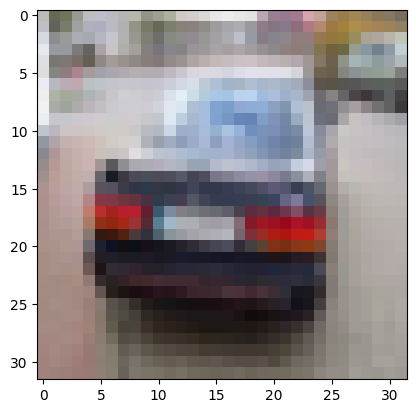

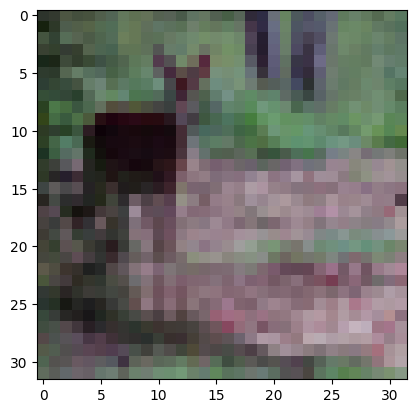

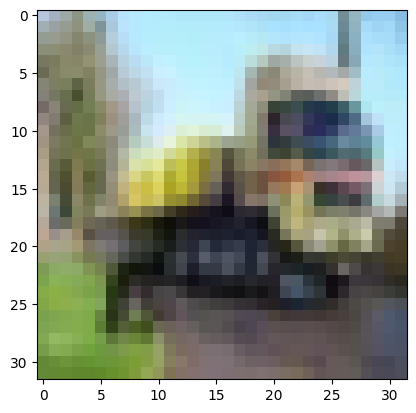

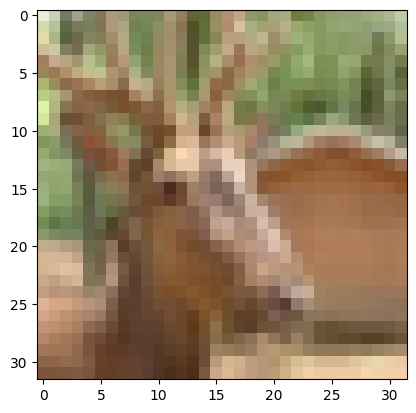

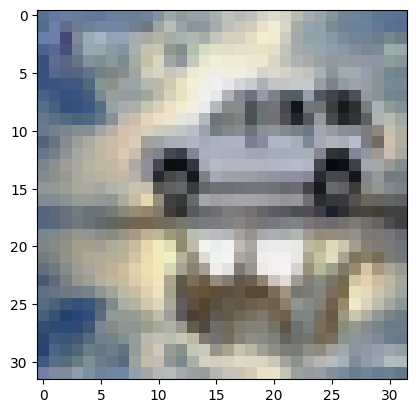

In [5]:
import matplotlib.pyplot as plt
for data_batch, _ in full_train_ds.take(1):
  for i in range(5):
    plt.imshow(data_batch[i].numpy().astype("uint8"))
    plt.show()

In [7]:
from tensorflow.keras.applications.vgg16 import VGG16
#conv_base = VGG16(weights='imagenet', include_top=False, input_shape=(150, 150, 3))
conv_base = VGG16(weights='imagenet', include_top=False, input_shape=(32, 32, 3))

In [8]:
from tensorflow import keras
import numpy as np
def get_features_and_labels(dataset):
  all_features = []
  all_labels = []
  for images, labels in dataset:
    preprocessed_images = keras.applications.vgg16.preprocess_input(images)
    features = conv_base.predict(preprocessed_images)
    all_features.append(features)
    all_labels.append(labels)
  return np.concatenate(all_features), np.concatenate(all_labels)

In [10]:
train_features, train_labels = get_features_and_labels(full_train_ds)
val_features, val_labels = get_features_and_labels(val_ds2)
test_features, test_labels = get_features_and_labels(test_ds)

1/1 [==============================] - 0s 33ms/step


In [18]:
from tensorflow import keras 
from keras import layers
#inputs = keras.Input(shape=(4, 4, 512)) 
inputs = keras.Input(shape=(1, 1, 512)) 
x = layers.Flatten()(inputs)
x = layers.Dense(256)(x)
x = layers.Dropout(0.5)(x)
outputs = layers.Dense(1, activation="sigmoid")(x) 
model = keras.Model(inputs, outputs)

In [16]:
model.compile( 
  loss='binary_crossentropy', 
  optimizer='rmsprop', 
  metrics=['accuracy']
)
history = model.fit(
  train_features, train_labels,
  epochs=20,
  validation_data=(val_features, val_labels)
)

Epoch 1/20


ValueError: in user code:

    File "/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/engine/training.py", line 1401, in train_function  *
        return step_function(self, iterator)
    File "/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/engine/training.py", line 1384, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/engine/training.py", line 1373, in run_step  **
        outputs = model.train_step(data)
    File "/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/engine/training.py", line 1150, in train_step
        y_pred = self(x, training=True)
    File "/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/utils/traceback_utils.py", line 70, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/engine/input_spec.py", line 298, in assert_input_compatibility
        raise ValueError(

    ValueError: Input 0 of layer "model_2" is incompatible with the layer: expected shape=(None, 32, 1, 1, 512), found shape=(32, 1, 1, 512)
